In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
data=pd.read_csv("train 2.csv")
data

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [ ]:
data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
item=data[data['item']==1]
item

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
18255,2017-12-27,10,1,19
18256,2017-12-28,10,1,12
18257,2017-12-29,10,1,23
18258,2017-12-30,10,1,26


In [ ]:
item_1=pd.DataFrame(item.groupby(['date'])['sales'].sum())
item_1

,sales
date,
2013-01-01,133
2013-01-02,99
2013-01-03,127
2013-01-04,145
2013-01-05,149
...,...
2017-12-27,154
2017-12-28,178
2017-12-29,207


In [ ]:
item_1.reset_index(inplace=True)


In [ ]:
item_1['date'].unique()

array(['2013-01-01', '2013-01-02', '2013-01-03', ..., '2017-12-29',
       '2017-12-30', '2017-12-31'], dtype=object)

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px


fig = px.line(item_1, x='date', y="sales")
fig.show()

In [ ]:
fig.update_xaxes(
    
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(
    title={
        'text': "ITEM-2",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(item['sales'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Observations of Dickey-fuller test
Test Statistic                -7.155320e+00
p-value                        3.065459e-10
#lags used                     4.500000e+01
number of observations used    1.821400e+04
critical value (1%)           -3.430709e+00
critical value (5%)           -2.861699e+00
critical value (10%)          -2.566854e+00
dtype: float64


In [ ]:
#!pip install pystan
#!pip install fbprophet 

In [ ]:
from fbprophet import Prophet

In [ ]:
item_1['date']=pd.to_datetime(item_1['date'])
item_1.dtypes

date     datetime64[ns]
sales             int64
dtype: object

In [ ]:
model=Prophet(interval_width=0.95)

In [ ]:
item_1.rename(columns={'date':'ds','sales':'y'},inplace=True)

In [ ]:
item_1

,ds,y
0,2013-01-01,133
1,2013-01-02,99
2,2013-01-03,127
3,2013-01-04,145
4,2013-01-05,149
...,...,...
1821,2017-12-27,154
1822,2017-12-28,178
1823,2017-12-29,207
1824,2017-12-30,236


In [ ]:
m = Prophet(daily_seasonality=False)


In [ ]:
item_1.set_index('ds')

,y
ds,
2013-01-01,133
2013-01-02,99
2013-01-03,127
2013-01-04,145
2013-01-05,149
...,...
2017-12-27,154
2017-12-28,178
2017-12-29,207


In [ ]:
item_1=item_1.groupby(pd.Grouper(key='ds',freq='M')).agg({'y':'mean'})

In [ ]:

fig = px.line(item_1, x=item_1.index, y="y")
fig.show()

In [ ]:
quater=pd.DataFrame(item_1.groupby(item_1.index.to_period('Q'))['y'].sum())

In [ ]:
quater

,y
ds,
2013Q1,427.770737
2013Q2,620.561290
2013Q3,628.444086
2013Q4,514.922581
2014Q1,485.305300
2014Q2,719.075269
2014Q3,727.418280
2014Q4,589.926882
2015Q1,512.141705


In [ ]:
new=pd.DataFrame({"date":data[data['item']==1]['date']})

In [ ]:
new

,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
18255,2017-12-27
18256,2017-12-28
18257,2017-12-29
18258,2017-12-30


In [ ]:
for i in range(1,51):
    item=data[data['item']==i]['sales']
    item=item.reset_index(drop=True)
    new['item_'+str(i)]=item
    
new

,date,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,...,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50
0,2013-01-01,13,33,15,10,11,31,25,33,18,...,6,21,22,20,37,30,17,21,18,30
1,2013-01-02,11,43,30,11,6,36,23,37,23,...,15,24,27,15,40,30,15,26,10,32
2,2013-01-03,14,23,14,8,8,18,34,38,25,...,5,14,19,11,42,30,5,25,17,25
3,2013-01-04,13,18,10,19,9,19,36,54,22,...,9,22,29,22,49,37,13,26,22,32
4,2013-01-05,10,34,23,12,8,31,38,51,29,...,13,18,34,19,52,28,12,28,15,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18255,2017-12-27,19,43,32,16,19,47,47,60,44,...,14,35,41,22,64,50,16,52,24,63
18256,2017-12-28,12,35,33,29,14,72,53,65,39,...,18,37,47,30,79,48,21,36,29,59
18257,2017-12-29,23,53,39,22,20,59,56,65,58,...,26,37,52,30,72,69,18,59,26,74
18258,2017-12-30,26,56,34,15,21,52,60,81,58,...,22,44,58,30,76,72,10,54,40,62


In [ ]:
col=new.columns.to_list()
col

['date',
 'item_1',
 'item_2',
 'item_3',
 'item_4',
 'item_5',
 'item_6',
 'item_7',
 'item_8',
 'item_9',
 'item_10',
 'item_11',
 'item_12',
 'item_13',
 'item_14',
 'item_15',
 'item_16',
 'item_17',
 'item_18',
 'item_19',
 'item_20',
 'item_21',
 'item_22',
 'item_23',
 'item_24',
 'item_25',
 'item_26',
 'item_27',
 'item_28',
 'item_29',
 'item_30',
 'item_31',
 'item_32',
 'item_33',
 'item_34',
 'item_35',
 'item_36',
 'item_37',
 'item_38',
 'item_39',
 'item_40',
 'item_41',
 'item_42',
 'item_43',
 'item_44',
 'item_45',
 'item_46',
 'item_47',
 'item_48',
 'item_49',
 'item_50']

In [ ]:
new=new.groupby(['date']).sum()
new

,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,...,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,133,327,172,102,83,288,278,416,245,378,...,103,195,253,154,396,319,116,277,159,330
2013-01-02,99,279,213,110,81,310,291,386,225,397,...,132,215,255,165,393,316,118,281,159,384
2013-01-03,127,304,193,112,96,309,324,398,265,388,...,131,215,306,170,459,325,104,280,187,356
2013-01-04,145,359,218,138,108,343,335,430,313,462,...,122,224,323,189,450,351,128,296,184,394
2013-01-05,149,377,217,144,100,343,377,481,319,449,...,142,243,309,202,533,360,133,344,179,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,154,500,282,172,148,406,457,579,387,546,...,176,264,381,233,681,487,171,374,231,511
2017-12-28,178,495,298,190,157,506,499,644,420,609,...,172,346,415,248,707,473,188,395,276,587
2017-12-29,207,515,332,192,177,530,532,648,494,617,...,185,304,457,277,724,548,213,496,237,596


In [ ]:
def plot(i):    

    fig2=px.line(new, x=new.index, y=i)
    return fig2.show()
plot(col[1])

In [ ]:
plot(col[7])

In [ ]:
plot(col[15])

In [ ]:
plot(col[20])

In [ ]:
plot(col[25])

In [ ]:
new['ds']=new.index.tolist()
new=new.reset_index(drop=True)
new

,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,...,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50,ds
0,133,327,172,102,83,288,278,416,245,378,...,195,253,154,396,319,116,277,159,330,2013-01-01
1,99,279,213,110,81,310,291,386,225,397,...,215,255,165,393,316,118,281,159,384,2013-01-02
2,127,304,193,112,96,309,324,398,265,388,...,215,306,170,459,325,104,280,187,356,2013-01-03
3,145,359,218,138,108,343,335,430,313,462,...,224,323,189,450,351,128,296,184,394,2013-01-04
4,149,377,217,144,100,343,377,481,319,449,...,243,309,202,533,360,133,344,179,407,2013-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,154,500,282,172,148,406,457,579,387,546,...,264,381,233,681,487,171,374,231,511,2017-12-27
1822,178,495,298,190,157,506,499,644,420,609,...,346,415,248,707,473,188,395,276,587,2017-12-28
1823,207,515,332,192,177,530,532,648,494,617,...,304,457,277,724,548,213,496,237,596,2017-12-29
1824,236,538,342,211,173,532,609,784,492,698,...,338,507,266,762,566,190,502,303,612,2017-12-30


In [ ]:
new['ds']=pd.DatetimeIndex(new['ds'])

In [ ]:
new=new.set_index('ds')
new

,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,...,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50
ds,,,,,,,,,,,,,,,,,,,,,
2013-01-01,133,327,172,102,83,288,278,416,245,378,...,103,195,253,154,396,319,116,277,159,330
2013-01-02,99,279,213,110,81,310,291,386,225,397,...,132,215,255,165,393,316,118,281,159,384
2013-01-03,127,304,193,112,96,309,324,398,265,388,...,131,215,306,170,459,325,104,280,187,356
2013-01-04,145,359,218,138,108,343,335,430,313,462,...,122,224,323,189,450,351,128,296,184,394
2013-01-05,149,377,217,144,100,343,377,481,319,449,...,142,243,309,202,533,360,133,344,179,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,154,500,282,172,148,406,457,579,387,546,...,176,264,381,233,681,487,171,374,231,511
2017-12-28,178,495,298,190,157,506,499,644,420,609,...,172,346,415,248,707,473,188,395,276,587
2017-12-29,207,515,332,192,177,530,532,648,494,617,...,185,304,457,277,724,548,213,496,237,596


In [ ]:
d=pd.DataFrame({"DS":new.index,"Y":new.item_1})

In [ ]:
df=d.reset_index(drop=True)
df

,DS,Y
0,2013-01-01,133
1,2013-01-02,99
2,2013-01-03,127
3,2013-01-04,145
4,2013-01-05,149
...,...,...
1821,2017-12-27,154
1822,2017-12-28,178
1823,2017-12-29,207
1824,2017-12-30,236


In [ ]:
df['Y'].dtype

dtype('int64')

In [ ]:
df_1=pd.DataFrame({"ds":quater.index,"y":quater.y})
df_1=df_1.reset_index(drop=True)
df_1

,ds,y
0,2013Q1,427.770737
1,2013Q2,620.561290
2,2013Q3,628.444086
3,2013Q4,514.922581
4,2014Q1,485.305300
5,2014Q2,719.075269
6,2014Q3,727.418280
7,2014Q4,589.926882
8,2015Q1,512.141705
9,2015Q2,751.991398


In [ ]:
new.item_1[0:89].sum()

12644

In [ ]:
new.item_1[1:90].sum()

12714

In [ ]:
new.item_1[2:91].sum()

12749

In [ ]:
len(new)

1826

In [ ]:
agg_data={"date":[],"sales":[]}

for i in range(len(new)):
    if len(new[i:i+90])==90:
        agg_data['date'].append(new.index[i])
        agg_data['sales'].append(new.item_1[i:i+90].sum())

In [ ]:
agg_data=pd.DataFrame(agg_data)
agg_data

,date,sales
0,2013-01-01,12847
1,2013-01-02,12848
2,2013-01-03,12936
3,2013-01-04,13019
4,2013-01-05,13103
...,...,...
1732,2017-09-29,20796
1733,2017-09-30,20704
1734,2017-10-01,20642
1735,2017-10-02,20578


In [ ]:
fig = px.line(agg_data, x='date', y="sales")
fig.show()

In [ ]:
#pip install pystan

In [ ]:
#conda install -c conda-forge fbprophet

In [ ]:
agg_data.rename(columns={'date':'ds','sales':'y'},inplace=True, errors='raise')
agg_data.head

<bound method NDFrame.head of              ds      y
0    2013-01-01  12847
1    2013-01-02  12848
2    2013-01-03  12936
3    2013-01-04  13019
4    2013-01-05  13103
...         ...    ...
1732 2017-09-29  20796
1733 2017-09-30  20704
1734 2017-10-01  20642
1735 2017-10-02  20578
1736 2017-10-03  20610

[1737 rows x 2 columns]>

In [ ]:
agg_data['ds'].dtype

dtype('<M8[ns]')

In [ ]:
from fbprophet import Prophet

In [ ]:
model=Prophet()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
model.fit(agg_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
future_dates=model.make_future_dataframe(periods=90)

In [ ]:
future_dates

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
1822,2017-12-28
1823,2017-12-29
1824,2017-12-30
1825,2017-12-31


In [ ]:
prediction=model.predict(future_dates)

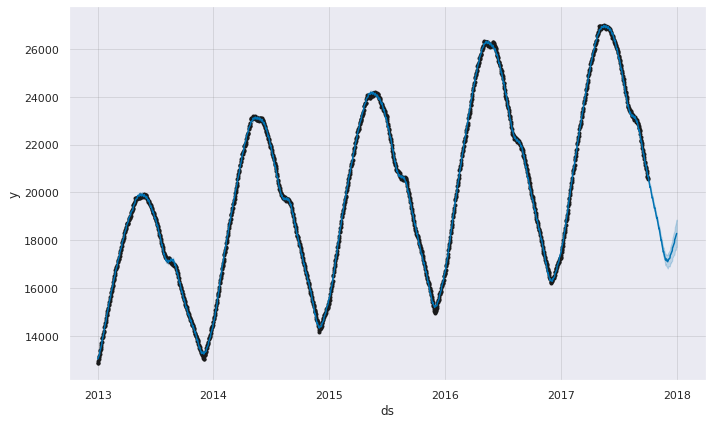

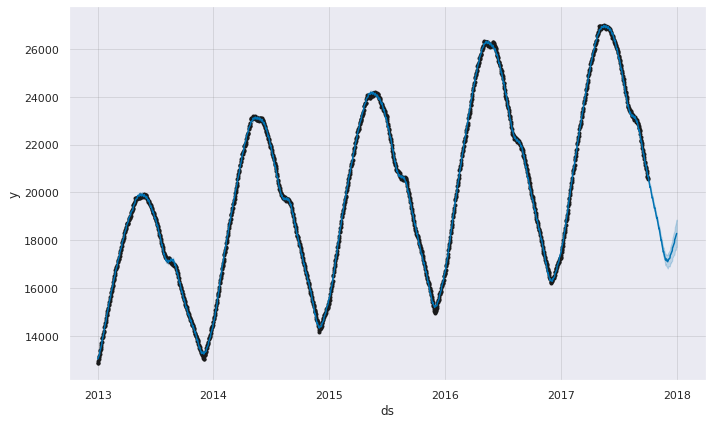

In [ ]:
model.plot(prediction )

In [ ]:
prediction['yhat']

0       13032.925785
1       13044.154735
2       13084.822276
3       13117.014292
4       13148.514501
            ...     
1822    18106.119122
1823    18148.075935
1824    18188.448628
1825    18232.183170
1826    18279.168869
Name: yhat, Length: 1827, dtype: float64

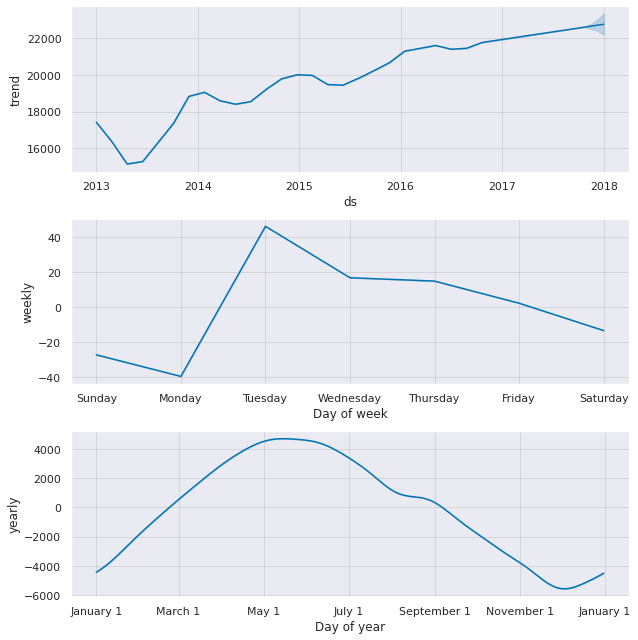

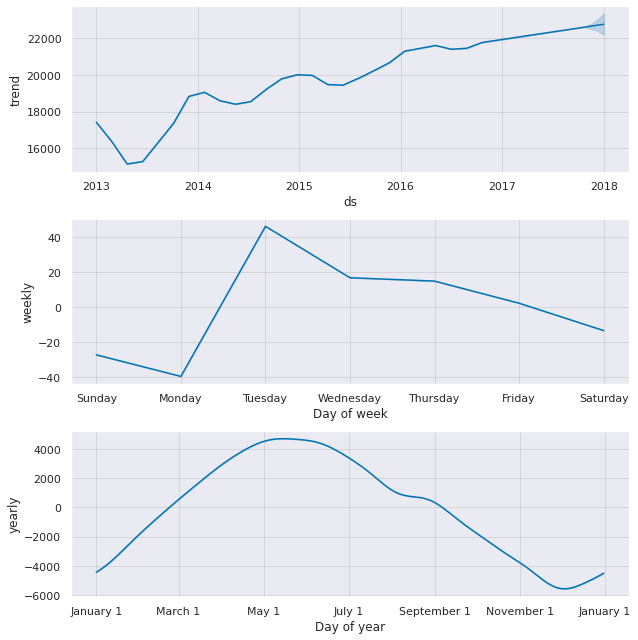

In [ ]:
model.plot_components(prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv=cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_cv.head()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2015-04-12 00:00:00 and 2016-10-03 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-04-13,23113.713022,23056.167892,23172.133705,23066,2015-04-12
1,2015-04-14,23243.463943,23190.485627,23297.528398,23206,2015-04-12
2,2015-04-15,23266.303120,23208.504391,23326.184429,23201,2015-04-12
3,2015-04-16,23311.803417,23257.811774,23369.618284,23226,2015-04-12
4,2015-04-17,23350.417550,23290.137723,23408.033286,23265,2015-04-12


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,33345.922597,182.608660,139.198806,0.007038,0.005235,0.369863
1,38 days,34772.641727,186.474239,141.848223,0.007205,0.005470,0.369863
2,39 days,36095.503336,189.988166,144.483587,0.007367,0.005554,0.380137
3,40 days,37355.440717,193.275556,146.769686,0.007509,0.005554,0.393836
4,41 days,38532.216041,196.296246,148.793589,0.007642,0.005570,0.410959


In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-04-13,23113.713022,23056.167892,23172.133705,23066,2015-04-12
1,2015-04-14,23243.463943,23190.485627,23297.528398,23206,2015-04-12
2,2015-04-15,23266.303120,23208.504391,23326.184429,23201,2015-04-12
3,2015-04-16,23311.803417,23257.811774,23369.618284,23226,2015-04-12
4,2015-04-17,23350.417550,23290.137723,23408.033286,23265,2015-04-12
...,...,...,...,...,...,...
1455,2017-09-29,21746.641636,16204.212390,27921.148520,20796,2016-10-03
1456,2017-09-30,21673.451473,16097.638176,27832.698715,20704,2016-10-03
1457,2017-10-01,21602.989245,16013.489537,27831.656189,20642,2016-10-03
1458,2017-10-02,21532.464846,15988.266194,27764.334356,20578,2016-10-03


In [ ]:
prediction[1730:1737]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1730,2017-09-27,22548.781833,20967.055147,21142.546832,22548.781833,22548.781833,-1498.728770,-1498.728770,-1498.728770,16.738477,16.738477,16.738477,-1515.467247,-1515.467247,-1515.467247,0.0,0.0,0.0,21050.053063
1731,2017-09-28,22551.054524,20907.122291,21067.046980,22551.054524,22551.054524,-1567.850037,-1567.850037,-1567.850037,14.831981,14.831981,14.831981,-1582.682018,-1582.682018,-1582.682018,0.0,0.0,0.0,20983.204487
1732,2017-09-29,22553.327216,20820.116804,20985.229798,22553.327216,22553.327216,-1647.455112,-1647.455112,-1647.455112,2.248952,2.248952,2.248952,-1649.704064,-1649.704064,-1649.704064,0.0,0.0,0.0,20905.872104
1733,2017-09-30,22555.599907,20736.369701,20909.175214,22555.599907,22555.599907,-1729.962675,-1729.962675,-1729.962675,-13.322614,-13.322614,-13.322614,-1716.640061,-1716.640061,-1716.640061,0.0,0.0,0.0,20825.637232
1734,2017-10-01,22557.872599,20661.478081,20828.410713,22557.872599,22557.872599,-1810.693338,-1810.693338,-1810.693338,-27.109176,-27.109176,-27.109176,-1783.584162,-1783.584162,-1783.584162,0.0,0.0,0.0,20747.179261
1735,2017-10-02,22560.145290,20591.261805,20759.168848,22560.145290,22560.145290,-1890.004106,-1890.004106,-1890.004106,-39.389786,-39.389786,-39.389786,-1850.614320,-1850.614320,-1850.614320,0.0,0.0,0.0,20670.141184
1736,2017-10-03,22562.417981,20607.368176,20774.875698,22562.417981,22562.417981,-1871.787233,-1871.787233,-1871.787233,46.002166,46.002166,46.002166,-1917.789398,-1917.789398,-1917.789398,0.0,0.0,0.0,20690.630749


In [ ]:
agg_data['y']

0       12847
1       12848
2       12936
3       13019
4       13103
        ...  
1732    20796
1733    20704
1734    20642
1735    20578
1736    20610
Name: y, Length: 1737, dtype: int64

In [ ]:
test=pd.DataFrame({'date':agg_data.ds,'y_act':agg_data.y,'y_pred':prediction.yhat[0:1737]})

In [ ]:
test

,date,y_act,y_pred
0,2013-01-01,12847,13032.925785
1,2013-01-02,12848,13044.154735
2,2013-01-03,12936,13084.822276
3,2013-01-04,13019,13117.014292
4,2013-01-05,13103,13148.514501
...,...,...,...
1732,2017-09-29,20796,20905.872104
1733,2017-09-30,20704,20825.637232
1734,2017-10-01,20642,20747.179261
1735,2017-10-02,20578,20670.141184


In [ ]:
test['y_diff']=test.y_act-test.y_pred

In [ ]:
test[test['y_diff']>0]['y_diff'].sum()   # postive error values

43798.63070838948

In [ ]:
test[test['y_diff']<0]['y_diff'].sum() #negative error value

-43791.598657658324

In [ ]:
import math
import scipy

# Forier Transform method (adding multiple Sine wave to form pattern)

In [ ]:
p0=12500
p1=6
Amplitude=1000
pi=3.14
Phase=1
Period=365
X=np.arange(1736)
Y = (p0 + p1*np.array(X) + Amplitude*np.sin(2*pi*(np.array(X)-Phase)/Period)*0.8+5000*np.sin(2*pi*(np.array(X)-Phase)/365)*0.8+500*np.sin(2*pi*(np.array(X)-Phase)/365)*1.5)
Y

array([12404.51430029, 12506.        , 12607.48569971, ...,
       17353.67845558, 17356.18079356, 17360.32540375])

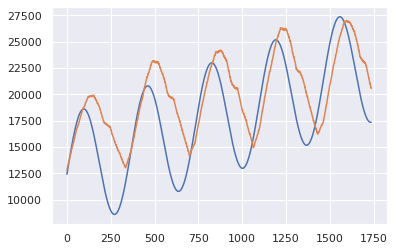

In [ ]:
plt.plot(Y)
plt.plot(agg_data.y)